In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [21]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [22]:
df.columns = ['Demand']

In [23]:
malli = Holt(df['Demand']).fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


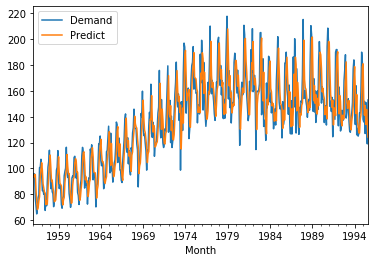

In [24]:
df['Predict'] = malli.fittedvalues
df.plot()

In [6]:
sqrt(mean_squared_error(df['Demand'], df['Predict']))

18.887712861850254

In [7]:
mean_absolute_error(df['Demand'], df['Predict'])

14.93299324234826

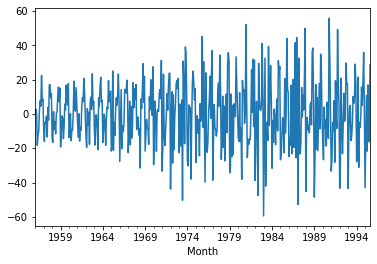

In [8]:
df['Resid'] = malli.resid

df['Resid'].plot()

In [9]:
df.tail()

,Demand,Predict,Resid
Month,,,
1995-04-01,127.0,148.641777,-21.641777
1995-05-01,151.0,134.083124,16.916876
1995-06-01,130.0,145.652571,-15.652571
1995-07-01,119.0,135.152322,-16.152322
1995-08-01,153.0,124.313432,28.686568


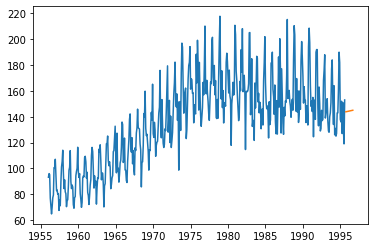

In [39]:
index = pd.date_range('1995-09-01', periods=12, freq='M')
plt.plot(df.index,df['Demand'])
plt.plot(index,malli.forecast(12))

In [40]:
malli.params

{'smoothing_level': 0.6776196069123868,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 93.17757022355165,
 'initial_slope': 0.10623998018875094,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [41]:
df

,Demand,Predict
Month,,
1956-01-01,93.2,93.283810
1956-02-01,96.0,93.333259
1956-03-01,95.2,95.246535
1956-04-01,77.1,95.321242
1956-05-01,70.9,83.080411
1956-06-01,64.8,74.932966
1956-07-01,70.1,68.172909
1956-08-01,77.3,69.584984
1956-09-01,79.5,74.919070
